<a href="https://colab.research.google.com/github/WarrPath/COVID-ICU-Predictions/blob/main/COVID_ICU_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Purpose**

The COVID-19 pandemic has impacted the whole world, overwhelming healthcare systems and causing us to rethink its organization after having been unprepared for such intense and lengthy requests for ICU beds, the workload burden on professionals, personal protection equipment supply shortages, and limited healthcare resources. 

Due to rapid increases in COVID-19 cases, ICU units have been nearing or are at capacity. My objective is to use a ML model to predict if a patient of a confirmed COVID-19 case will require admission to ICU in hopes to reduce the strain on the hospital's ICU bed capacity.


**Task**

Prepare a Machine Learning model based on the clinical data of confirmed COVID-19 cases from Hospital Sírio-Libanês in Brazil. The database contains health monitoring data of patients in different windows of events and whether or not they are eventually admitted to the intensive care unit (ICU). This will predict the need of ICU for a patient in advance which will help your hospital plan the flow of operations and to make critical decisions for saving lives.

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tabulate
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

**Upload Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Kaggle_Sirio_Libanes_ICU_Prediction.xlsx to Kaggle_Sirio_Libanes_ICU_Prediction.xlsx


In [3]:
df = pd.read_excel('Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')

**Exploratory Data Analysis**

Make observations to understand the dataset.

# Exploratory Data Analysis

Make observations to understand the dataset.

In [4]:
# View column headers with first 15 rows of the dataset; a glimpse at the features of the dataset
df.head(15)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
5,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
6,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,1
7,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,1
8,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.880952,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,6-12,1
9,1,1,90th,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,1


Columns AGE_PERCENTIL and WINDOW have non-numerical data that will be transformed later into numerical data.

There are also null (NaN) values that will need to be filled in for.

In [5]:
# Show all column headers with the number of entries per column and the data type for the column
df.info(show_counts=True, max_cols=231)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 231 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    PATIENT_VISIT_IDENTIFIER          1925 non-null   int64  
 1    AGE_ABOVE65                       1925 non-null   int64  
 2    AGE_PERCENTIL                     1925 non-null   object 
 3    GENDER                            1925 non-null   int64  
 4    DISEASE GROUPING 1                1920 non-null   float64
 5    DISEASE GROUPING 2                1920 non-null   float64
 6    DISEASE GROUPING 3                1920 non-null   float64
 7    DISEASE GROUPING 4                1920 non-null   float64
 8    DISEASE GROUPING 5                1920 non-null   float64
 9    DISEASE GROUPING 6                1920 non-null   float64
 10   HTN                               1920 non-null   float64
 11   IMMUNOCOMPROMISED                 1920 non-null   floa

We can see that there are 231 columns of data:

*   3 are demographics
*   9 disease groupings (comorbidities)
*   36 blood test results (each with minimum, maximum, difference, mean, and median)
*   6 vital signs (each with minimum, maximum, relataive difference, mean, and median)

Again, 2 of the columns are of type oject (non-numerical), and the non-null counts are not all the same which indicates there is null/missing data (counts should all be at 1925).





In [6]:
# Check for null values
df.isnull().values.any()

True

Result of "True" verifies that there are null values in the dataset.

Null values will be filled when praparing the data for the machine learning model (before implementation).

In [7]:
# Check for duplicate values
df.duplicated().values.any()

False

Result of "False" indicates that there are no duplicate values.

In [8]:
# Check if patient IDs are repeated
df['PATIENT_VISIT_IDENTIFIER'].value_counts()

0      5
193    5
263    5
262    5
261    5
      ..
126    5
125    5
124    5
123    5
384    5
Name: PATIENT_VISIT_IDENTIFIER, Length: 385, dtype: int64

Patient IDs are repeated for 5 window time frames with demographic information, blood test and vital sign results, and an indication if the patient was admitted into ICU or not during each window.

In [9]:
total_patients = len(df.groupby("PATIENT_VISIT_IDENTIFIER").count().index)
print(f'{total_patients} total patients in the dataset')

385 total patients in the dataset


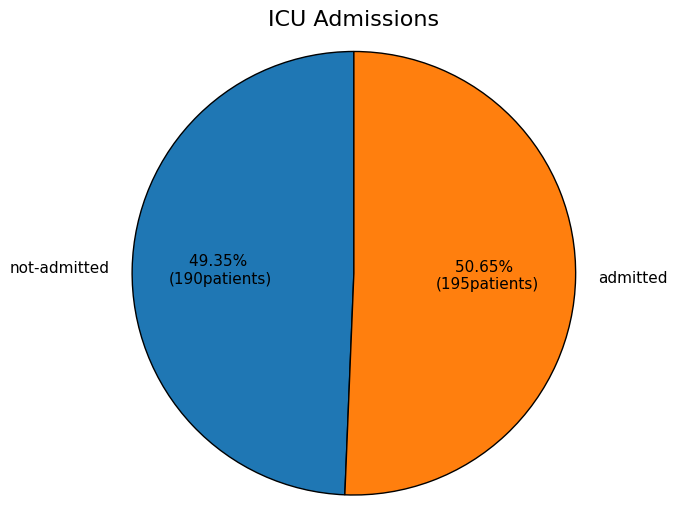

In [10]:
# Percent and number of patients admitted or not admitted into ICU
ICU_grouped = df[df['WINDOW'] == 'ABOVE_12'].groupby('ICU')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()

labels = ["not-admitted", "admitted"]
plt.title('ICU Admissions', fontdict={'fontsize': 16}, pad=45)
plt.pie(ICU_grouped['PATIENT_VISIT_IDENTIFIER'], textprops={'fontsize': 11}, radius=1.5, labels=labels, startangle=90,
        wedgeprops={'linewidth':1, 'edgecolor':'black'},
        autopct=lambda p: '{:.2f}% \n({:,.0f}patients)'.format(p,p * sum(ICU_grouped['PATIENT_VISIT_IDENTIFIER'])/100))
plt.show()

There are about the same number of patients admitted into ICU as those who were not.

In [11]:
# Indicate which window each patient was admitted into ICU
ICU_admit = df.groupby('PATIENT_VISIT_IDENTIFIER', as_index = False).agg({'ICU':list, 'WINDOW':list})
ICU_admit.head(15)

,PATIENT_VISIT_IDENTIFIER,ICU,WINDOW
0,0,"[0, 0, 0, 0, 1]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
1,1,"[1, 1, 1, 1, 1]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
2,2,"[0, 0, 0, 0, 1]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
3,3,"[0, 0, 0, 0, 0]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
4,4,"[0, 0, 0, 0, 0]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
5,5,"[0, 0, 0, 0, 0]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
6,6,"[0, 0, 0, 0, 0]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
7,7,"[0, 0, 0, 0, 0]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
8,8,"[0, 0, 0, 0, 0]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
9,9,"[0, 0, 0, 0, 0]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"


Patient 0 was admitted into ICU after 12+ hours of being admitted into the hospital.

Patient 1 was admitted into ICU between 0-2 hours after being admitted into the hospital.

Patient 3 was not admitted into ICU.

Patient 11 was admitted into ICU between 6-12 hours after being admitted into the hospital.

Patient 14 was admitted into ICU between 4-6 hours after being admitted into the hospital.

In [12]:
# Number of patients admitted (1) and not admitted (0) into ICU per window time frame
df.groupby(['WINDOW'])['ICU'].value_counts().unstack(fill_value=0).assign(Total = lambda x: x.sum(axis=1))

ICU,0,1,Total
WINDOW,,,
0-2,353,32,385
2-4,326,59,385
4-6,286,99,385
6-12,255,130,385
ABOVE_12,190,195,385


Once a patient is admitted into ICU, they will continue to be in ICU for the subsequent window time frames. In order to obtain the number of *new* patients admitted, subtract the previous window's number of ICU admissions from the desired window's ICU admission count.


Number of patients *admitted* into ICU per window time frame:

32 ICU admissions in window 0-2 hours.

27 new ICU admissions in window 2-4 hours.

40 new ICU admissions in window 4-6 hours.

31 new ICU admissions in window 6-12 hours.

65 new ICU admissions in window Above 12 hours.


There are nearly twice as many ICU admissions in the Above 12 hour window time frame than any of the other windows.

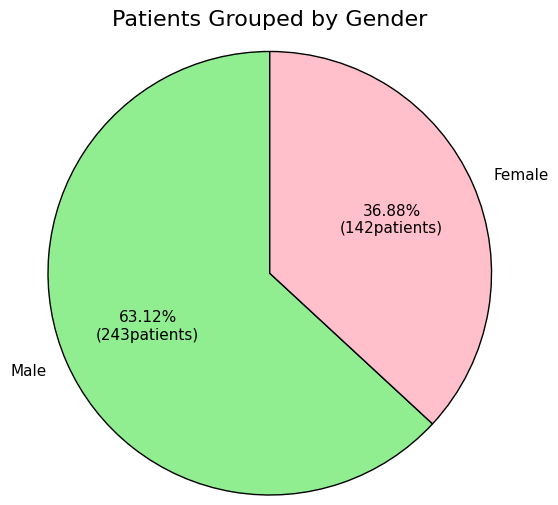

In [13]:
# Percent and number of patients per gender
gender_group = df[df['WINDOW'] == 'ABOVE_12'].groupby('GENDER')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()

labels = ["Male", "Female"]
plt.title('Patients Grouped by Gender', fontdict= {'fontsize' : 16}, pad=45)
plt.pie(gender_group['PATIENT_VISIT_IDENTIFIER'],textprops={'fontsize': 11},radius =1.5, labels = labels, startangle=90,
        wedgeprops={'linewidth':1, 'edgecolor':'black'}, colors=('lightgreen', 'pink'),
        autopct=lambda p : '{:.2f}%\n({:,.0f}patients)'.format(p,p * sum(gender_group['PATIENT_VISIT_IDENTIFIER'])/100))
plt.show()

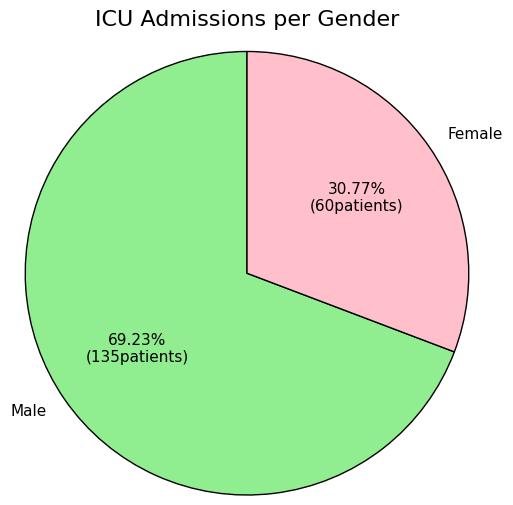

In [14]:
# Percent and number of patients admitted into ICU per gender
ICU_admit = df[df['WINDOW'] == 'ABOVE_12']

gender_ICU = ICU_admit[ICU_admit['ICU'] == 1]
gender_ICU = gender_ICU.groupby('GENDER')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()

labels = ['Male', 'Female']
plt.title('ICU Admissions per Gender', fontdict= {'fontsize' : 16}, pad=45)
plt.pie(gender_ICU['PATIENT_VISIT_IDENTIFIER'],textprops={'fontsize': 11},radius =1.5, labels = labels, startangle=90,
        wedgeprops={'linewidth':1, 'edgecolor':'black'}, colors=('lightgreen', 'pink'),
        autopct=lambda p : '{:.2f}%\n({:,.0f}patients)'.format(p,p * sum(gender_ICU['PATIENT_VISIT_IDENTIFIER'])/100))
plt.show()

There are more than twice as many males admitted into ICU than females. However, that is proportional to the number of male and female patients admitted to the hospital.

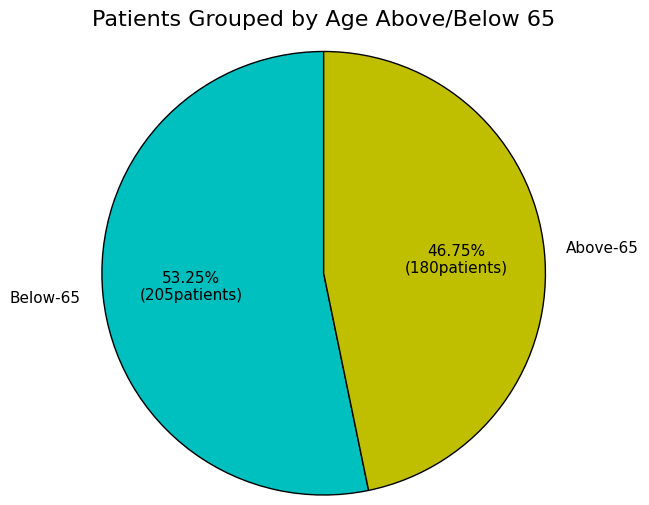

In [15]:
# Percent and number of patients above and below the age of 65
age_group = df[df['WINDOW'] == 'ABOVE_12'].groupby('AGE_ABOVE65')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()

labels = ["Below-65", "Above-65"]
plt.title('Patients Grouped by Age Above/Below 65', fontdict= {'fontsize' : 16}, pad=45)
plt.pie(age_group['PATIENT_VISIT_IDENTIFIER'],textprops={'fontsize': 11},radius =1.5, labels = labels, startangle=90,
        wedgeprops={'linewidth':1, 'edgecolor':'black'}, colors=('c', 'y'),
        autopct=lambda p : '{:.2f}%\n({:,.0f}patients)'.format(p,p * sum(age_group['PATIENT_VISIT_IDENTIFIER'])/100))
plt.show()

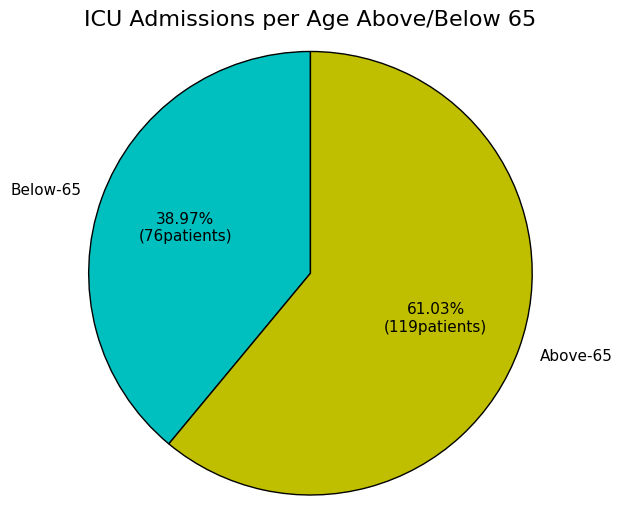

In [16]:
# Percent and number of patients above and below the age of 65 admitted into ICU
ICU_admit = df[df['WINDOW'] == 'ABOVE_12']

AGE_65_ICU = ICU_admit[ICU_admit['ICU'] == 1]
AGE_65_ICU = AGE_65_ICU.groupby('AGE_ABOVE65')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()

labels = ["Below-65", "Above-65"]
plt.title('ICU Admissions per Age Above/Below 65', fontdict= {'fontsize' : 16}, pad=45)
plt.pie(AGE_65_ICU['PATIENT_VISIT_IDENTIFIER'],textprops={'fontsize': 11},radius =1.5, labels = labels, startangle=90,
        wedgeprops={'linewidth':1, 'edgecolor':'black'}, colors=('c', 'y'),
        autopct=lambda p : '{:.2f}%\n({:,.0f}patients)'.format(p,p * sum(AGE_65_ICU['PATIENT_VISIT_IDENTIFIER'])/100))
plt.show()

Despite there being slightly more patients below the age of 65 admitted to the hospital, there are nearly twice as many patients above the age of 65 admitted into ICU.

In [17]:
# Total number of patients per age percentile (age bracket)
age_p = df[df['WINDOW'] == 'ABOVE_12'].groupby('AGE_PERCENTIL')['PATIENT_VISIT_IDENTIFIER'].count()
print(age_p)

AGE_PERCENTIL
10th          41
20th          43
30th          41
40th          40
50th          38
60th          37
70th          39
80th          38
90th          31
Above 90th    37
Name: PATIENT_VISIT_IDENTIFIER, dtype: int64


In [18]:
# Number of patients admitted into ICU per age percentile (age bracket)
age_p_icu = df[df['WINDOW'] == 'ABOVE_12'].groupby('AGE_PERCENTIL')['ICU'].sum().reset_index()
print(age_p_icu)

  AGE_PERCENTIL  ICU
0          10th   10
1          20th   12
2          30th   18
3          40th   15
4          50th   20
5          60th   20
6          70th   22
7          80th   26
8          90th   23
9    Above 90th   29


Despite the ages of patients admitted to the hospital being evening distributed, there are more ICU admissions as the age percentile (age bracket) increases.

In [19]:
# Number of patients admitted and not addmited into ICU for each disease grouping (comorbidity)
DG1 = df[df['DISEASE GROUPING 1'] == 1].groupby(['DISEASE GROUPING 1'])['ICU'].value_counts().unstack(fill_value=0).assign(Total = lambda x: x.sum(axis=1))
DG2 = df[df['DISEASE GROUPING 2'] == 1].groupby(['DISEASE GROUPING 2'])['ICU'].value_counts().unstack(fill_value=0).assign(Total = lambda x: x.sum(axis=1))
DG3 = df[df['DISEASE GROUPING 3'] == 1].groupby(['DISEASE GROUPING 3'])['ICU'].value_counts().unstack(fill_value=0).assign(Total = lambda x: x.sum(axis=1))
DG4 = df[df['DISEASE GROUPING 4'] == 1].groupby(['DISEASE GROUPING 4'])['ICU'].value_counts().unstack(fill_value=0).assign(Total = lambda x: x.sum(axis=1))
DG5 = df[df['DISEASE GROUPING 5'] == 1].groupby(['DISEASE GROUPING 5'])['ICU'].value_counts().unstack(fill_value=0).assign(Total = lambda x: x.sum(axis=1))
DG6 = df[df['DISEASE GROUPING 6'] == 1].groupby(['DISEASE GROUPING 6'])['ICU'].value_counts().unstack(fill_value=0).assign(Total = lambda x: x.sum(axis=1))
DG_HTN = df[df['HTN'] == 1].groupby(['HTN'])['ICU'].value_counts().unstack(fill_value=0).assign(Total = lambda x: x.sum(axis=1))
DG_IMMUNO = df[df['IMMUNOCOMPROMISED'] == 1].groupby(['IMMUNOCOMPROMISED'])['ICU'].value_counts().unstack(fill_value=0).assign(Total = lambda x: x.sum(axis=1))
DG_OTHER = df[df['OTHER'] == 1].groupby(['OTHER'])['ICU'].value_counts().unstack(fill_value=0).assign(Total = lambda x: x.sum(axis=1))

DG_data = [{'Disease Group 1': DG1, 'Disease Group 2': DG2, 'Disease Group 3': DG3, 'Disease Group 4': DG4, 'Disease Group 5': DG5, 'Disease Group 6': DG6,
            'HTN Group': DG_HTN, 'Immunocompromised Group': DG_IMMUNO, 'Disease Group Other': DG_OTHER}]

header = DG_data[0].keys()
rows =  [x.values() for x in DG_data]
print(tabulate.tabulate(rows, header))

Disease Group 1                     Disease Group 2                    Disease Group 3                     Disease Group 4                    Disease Group 5                     Disease Group 6                    HTN Group             Immunocompromised Group            Disease Group Other
----------------------------------  ---------------------------------  ----------------------------------  ---------------------------------  ----------------------------------  ---------------------------------  --------------------  ---------------------------------  -----------------------
ICU                   0   1  Total  ICU                  0   1  Total  ICU                   0   1  Total  ICU                  0   1  Total  ICU                   0   1  Total  ICU                  0   1  Total  ICU    0    1  Total  ICU                  0   1  Total  ICU       0    1  Total
DISEASE GROUPING 1                  DISEASE GROUPING 2                 DISEASE GROUPING 3                  DISEASE GROUPIN

Patients with hypertension and comorbidities in disease groupings 2 and 4 have the highest percentages of ICU admissions among the different disease groupings (comorbidities).

While the characteristics of a majority of patients admitted into ICU fall under Gender (male), age (above 65), and particular disease groupings/comorbidities (HTN, Group 2 & 4), there overall is no feature that is ***highly*** correlated with whether or not a patient is going to the intensive care unit. It appears to be a "synergistic" combination from multiple variables that results in the need for a patient to be admitted (or not) into ICU. In complex analyses like this, machine learning algorithms can help.

# Data Preprocessing

There are values with letters/words (strings) as well as null values (NaN) that need to be processed for machine learning algorithms: 

*   convert non-numerical data to numeric data by label encoding
*   fill null values with neighboring window values



In [20]:
# Encode/update Age Percentil and Window data to numerical data:
#  e.g. 10th becomes 0, 20th becomes 1, etc.
#  e.g. 0-2 becomes 0, 2-4 becomes 1, etc.
le = LabelEncoder()

df['AGE_PERCENTIL']=le.fit_transform(df['AGE_PERCENTIL'])
df['WINDOW']=le.fit_transform(df['WINDOW'])

In [21]:
# Create new column 'ICU_SUM' to indicate if a patient is eventually admitted to ICU
ICU_sum = (df.groupby('PATIENT_VISIT_IDENTIFIER')['ICU'].sum()>0).reset_index()*1
ICU_sum.columns = ['PATIENT_VISIT_IDENTIFIER', 'ICU_SUM']

merged_data = pd.merge(df, ICU_sum, on = 'PATIENT_VISIT_IDENTIFIER')

In [22]:
# Since the patient's conditions do not vary significantly from one time window to another, we can replicate the data for each individual patient
# from their neighboring windows.
filled_data = merged_data.groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)\
    .fillna(method='ffill')\
    .fillna(method='bfill')

# Return the PATIENT_VISIT_IDENTIFIER column back to the dataset
filled_data.insert(0, 'PATIENT_VISIT_IDENTIFIER', df.PATIENT_VISIT_IDENTIFIER)

In [23]:
# Show that the dataset now has numerical values for AGE_PERCENTIL and WINDOW columns, a new column ICU_SUM to indicate if a patient is ever admitted
# into ICU, and null (NaN) values are filled.
filled_data.head(25)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,ICU_SUM
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,1
1,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0,1
2,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,0,1
3,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3,0,1
4,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,4,1,1
5,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,1,1
6,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,1,1
7,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,1,1
8,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,3,1,1
9,1,1,8,1,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,4,1,1


In [24]:
# Check for null data
filled_data.isnull().values.any()

False

In [25]:
# Check for duplicates
filled_data.duplicated().values.any()

False

# Machine Learning Models

In [26]:
# Set x and y values for machine learning models; y is the target variable - patients admitted into ICU.
X_data = np.array(filled_data.drop(['ICU'], axis = 1))
Y_data = np.array(filled_data[['ICU']])

*For all machine learning models*:

We want the algorithm to receive historical data to learn patterns and also to test the learned patterns, so the database will be split into training data to fit/"teach" the algorithm and test data to test its effectiveness.

The test sample will contain 30% of the database.

If the number of patients going into ICU on the training data is very different from the test data, the model may not be trained properly. To balance the division, use the stratify parameter.

<!-- The models will be trained and tested with all data from the database which does not allow for making predictions on future ICU admissions, but we will use it as a benchmark to compare the models when run with modified/cleaned data. -->

**Logistic Regression Model**

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome shall be a categorical or discrete value. It can be either Yes or No, 0 or 1, True or False etc; this makes it a binary classifier.

The algorithm, however, gives the probability that an instance belongs to a particular class instead of giving the exact value as 0 and 1. For this database, logistic regression will return the probability of each patient going into ICU. If the estimated probability is greater than 50%, then the model predicts that the patient will go into ICU.

In [27]:
def log_reg_model(df):
  df_test = df.copy()
  target = 'ICU'
  y = df_test.pop(target)
  X = df_test
  X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.30, stratify = Y_data)

  print(f'Training data: {X_train.shape}')
  print(f'Test data: {X_test.shape}\n')

  lr_model = LogisticRegression(max_iter = 10000, solver='lbfgs')
  lr_model.fit(X_train, y_train)
  y_test_pred = lr_model.predict(X_test)

  print(metrics.classification_report(y_test, y_test_pred))

  print("ROC_AUC_Score:",roc_auc_score(y_test, y_test_pred))

  plt.figure(figsize = (7, 5))
  sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, cmap = 'CMRmap_r', fmt = "d", cbar = True, xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'], annot_kws = {"fontsize":15})
  plt.show()

  return

In [ ]:
# score_all = log_reg_model(filled_data)

**Decision Tree Model**

Decision trees are versatile machine learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are capable of fitting complex datasets. In a decision tree, there are two nodes, which are the decision node and leaf node; the first ones are used to make any decision and may result in other branches, while the leaf nodes are the output of those decisions and do not contain any further branches.

In [28]:
def decision_tree_model(df):
  df_test = df.copy()
  target = 'ICU'
  y = df_test.pop(target)
  X = df_test
  X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.30, stratify = Y_data)

  print(f'Training data: {X_train.shape}')
  print(f'Test data: {X_test.shape}\n')

  dt_model = tree.DecisionTreeClassifier(max_depth=8)   #criterion='entropy',,max_leaf_nodes=10
  dt_model.fit(X_train,y_train)
  y_test_pred = dt_model.predict(X_test)

  print(metrics.classification_report(y_test, y_test_pred))

  print("ROC_AUC_Score:",roc_auc_score(y_test, y_test_pred))

  plt.figure(figsize = (7, 5))
  sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, cmap = 'CMRmap_r', fmt = "d", cbar = True, xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'], annot_kws = {"fontsize":15})
  plt.show()

  return

In [ ]:
# score_all = decision_tree_model(filled_data)

**K-Neighbors Model**

K-Neighbors, or KNN, uses proximity to make classifications or predictions based on how its neighbours are classified, working off the assumption that similar points can be found near one another.

In [29]:
def k_neighbors_model(df):
  df_test = df.copy()
  target = 'ICU'
  y = df_test.pop(target)
  X = df_test
  X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.30, stratify = Y_data)

  print(f'Training data: {X_train.shape}')
  print(f'Test data: {X_test.shape}\n')

  KNN_model = KNeighborsClassifier(n_neighbors=25,p=1)
  KNN_model.fit(X_train,y_train)
  y_test_pred = KNN_model.predict(X_test)

  print(metrics.classification_report(y_test, y_test_pred))

  print("ROC_AUC_Score:",roc_auc_score(y_test, y_test_pred))

  plt.figure(figsize = (7, 5))
  sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, cmap = 'CMRmap_r', fmt = "d", cbar = True, xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'], annot_kws = {"fontsize":15})
  plt.show()

  return

In [ ]:
# score_all = k_neighbors_model(filled_data)

# Data Cleaning & Model Testing
Prepare the data for the models and test the models prediction abilities.

Once a patient is admitted to ICU, their data cannot be used for modeling as we need to predict the need for future ICU admission rather than at the present moment. So we give the machine learning algorithm data from the windows before ICU admission. 

For the model to make more clinically relevant predictions, it will receive data only from the first window time frame of 0-2 hours and then from all windows except the last, above 12 hours. The earlier the model can predict the need for ICU treatment of the patient, the more it becomes clinically relevant.

In [30]:
# # Remove patients admitted to ICU in windows 2-4, 4-6, 6-12, and above 12
model_data = filled_data.copy()

window_0_2 = model_data[(model_data['WINDOW'] == 1)|(model_data['WINDOW'] == 2)|(model_data['WINDOW'] == 3)|(model_data['WINDOW'] == 4) & (model_data['ICU'] == 1)].index
model_data.drop(window_0_2, inplace=True)

model_data.head(15)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,ICU_SUM
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,1
5,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,1,1
10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0,0,1
15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,0
19,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.171717,-0.308696,-0.057718,-0.069094,-0.329749,-0.047619,-0.172436,4,0,0
20,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0,0,0
24,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.939394,-0.652174,-0.596165,-0.634847,-0.817204,-0.645793,-0.940077,4,0,0
25,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0,0,0
29,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.919192,-0.758651,-0.683267,-0.581849,-0.939068,-0.736640,-0.920927,4,0,0
30,6,1,6,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,0


*Precision*: the percent of correct predictions to the total number of predictions made by the model

*Recall*: the percent of correct predictions to the actual number of positive, ICU = 1 (true positive), or negative, ICU = 0 (true negative), instances

*F1-score*: the harmonic mean of precision and recall; weighted average of F1 is used to compare model efficiency over the accuracy score; the closer to 1, the better the model is at making correct predictions

*Roc-Auc score*: indicates model efficiency

*Confusion Matrix*:

 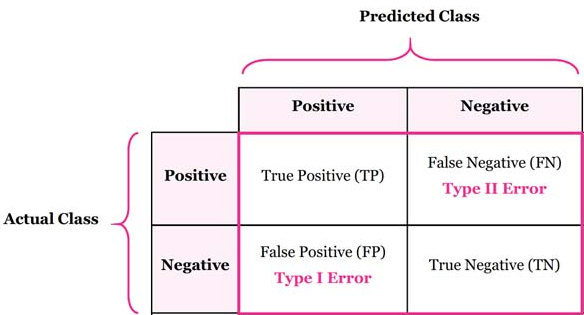

False positive: when the model predicts 1 but the real data is 0; i.e. a patient who would not need an ICU bed will occupy one; the impact of this error would unnecessarily increase the workload in ICU, reducing resources for those who really need it.

False negative: when the model predicts 0 and the real data is 1; i.e. a patient who would need an ICU bed is being sent home; the impact of this error puts the patient's life at risk as their health may worsen versus receiving treatment in ICU at the appropriate time.

Training data: (1347, 231)
Test data: (578, 231)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       423
           1       0.82      0.79      0.80       155

    accuracy                           0.90       578
   macro avg       0.87      0.86      0.87       578
weighted avg       0.90      0.90      0.90       578

ROC_AUC_Score: 0.8616334934797529


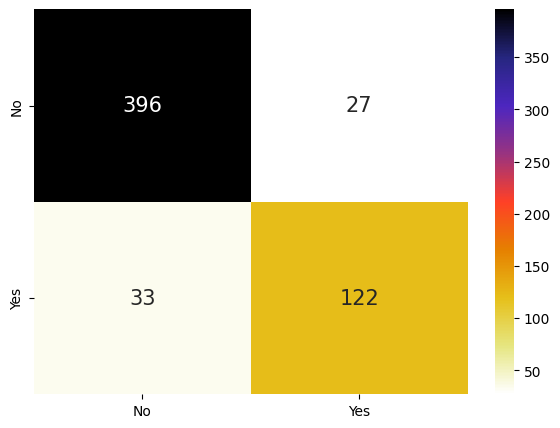

In [31]:
score_window_0 = log_reg_model(model_data)

Training data: (1347, 231)
Test data: (578, 231)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       423
           1       0.81      0.84      0.83       155

    accuracy                           0.90       578
   macro avg       0.88      0.88      0.88       578
weighted avg       0.91      0.90      0.91       578

ROC_AUC_Score: 0.883893845801876


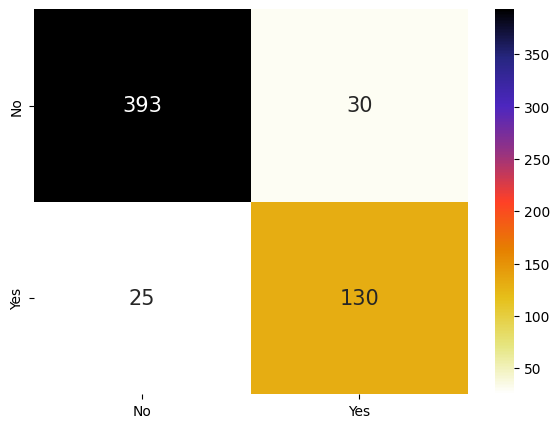

In [32]:
score_window_0 = decision_tree_model(model_data)

Training data: (1347, 231)
Test data: (578, 231)



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.78      1.00      0.87       423
           1       1.00      0.21      0.35       155

    accuracy                           0.79       578
   macro avg       0.89      0.61      0.61       578
weighted avg       0.84      0.79      0.73       578

ROC_AUC_Score: 0.6064516129032258


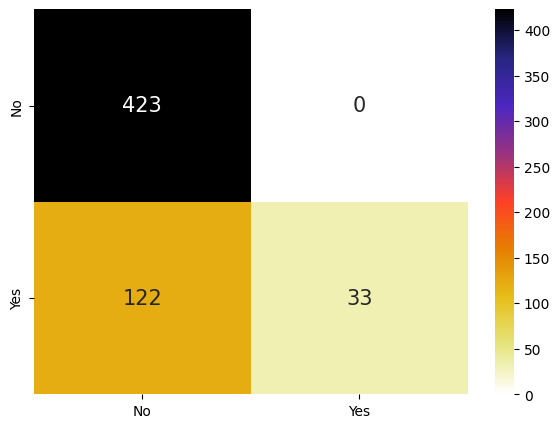

In [33]:
score_window_0 = k_neighbors_model(model_data)

While the K-Neighbors model has a weighted F1 score of .72, its efficiency is low at .59 and has a significant number of false negative predictions.

In [34]:
# Remove patients admitted to ICU in the last window 12+ hours
model_data = filled_data.copy()

remove_window_4 = model_data[(model_data['WINDOW'] == 4) & (model_data['ICU'] == 1)].index
model_data.drop(remove_window_4, inplace = True)

model_data.head(15)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,ICU_SUM
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,1
1,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0,1
2,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,0,1
3,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3,0,1
5,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,1,1
6,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,1,1
7,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,1,1
8,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,3,1,1
10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0,0,1
11,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1,0,1


Training data: (1347, 231)
Test data: (578, 231)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       423
           1       0.87      0.83      0.85       155

    accuracy                           0.92       578
   macro avg       0.90      0.89      0.90       578
weighted avg       0.92      0.92      0.92       578

ROC_AUC_Score: 0.8924883703195303


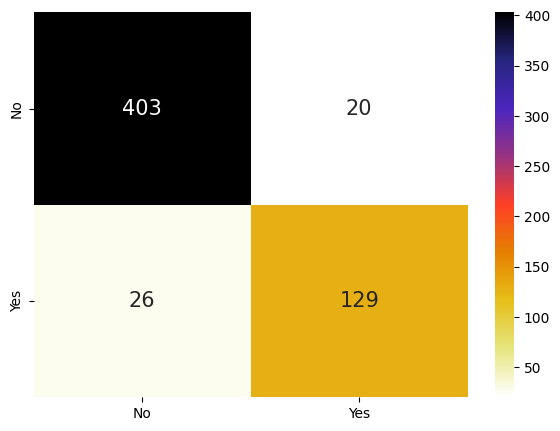

In [35]:
score_remove_window_4 = log_reg_model(model_data)

Training data: (1347, 231)
Test data: (578, 231)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       423
           1       0.84      0.83      0.83       155

    accuracy                           0.91       578
   macro avg       0.89      0.88      0.89       578
weighted avg       0.91      0.91      0.91       578

ROC_AUC_Score: 0.8845344314802104


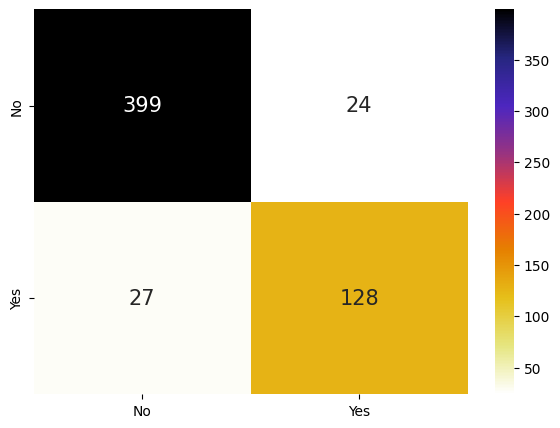

In [36]:
score_remove_window_4 = decision_tree_model(model_data)

Training data: (1347, 231)
Test data: (578, 231)



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.77      1.00      0.87       423
           1       0.97      0.19      0.31       155

    accuracy                           0.78       578
   macro avg       0.87      0.59      0.59       578
weighted avg       0.82      0.78      0.72       578

ROC_AUC_Score: 0.5923663539998474


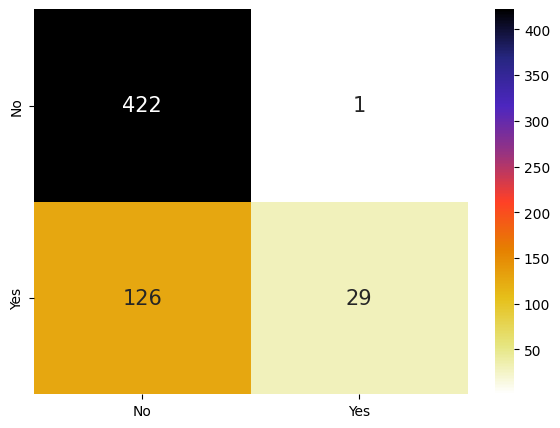

In [37]:
score_remove_window_4 = k_neighbors_model(model_data)

**Additional ICU Scenarios**

In [38]:
# Remove patients admitted to ICU in windows 4-6, 6-12, and above 12
model_data = filled_data.copy()

remove_window_234 = model_data[(model_data['WINDOW'] == 2)|(model_data['WINDOW'] == 3)|(model_data['WINDOW'] == 4) & (model_data['ICU'] == 1)].index
model_data.drop(remove_window_234, inplace=True)

model_data.head(15)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,ICU_SUM
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,1
1,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0,1
5,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,1,1
6,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,1,1
10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0,0,1
11,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1,0,1
15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,0
16,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0,0
19,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.171717,-0.308696,-0.057718,-0.069094,-0.329749,-0.047619,-0.172436,4,0,0
20,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0,0,0


Training data: (1347, 231)
Test data: (578, 231)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.93      0.94      0.94       423
           1       0.84      0.81      0.83       155

    accuracy                           0.91       578
   macro avg       0.89      0.88      0.88       578
weighted avg       0.91      0.91      0.91       578

ROC_AUC_Score: 0.8780828185769848


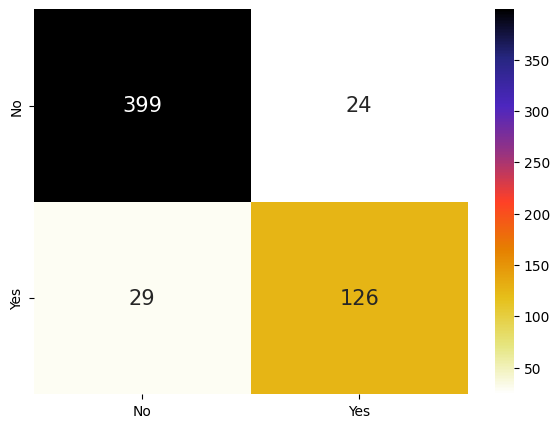

In [39]:
score_remove_window_234 = log_reg_model(model_data)

Training data: (1347, 231)
Test data: (578, 231)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       423
           1       0.77      0.81      0.79       155

    accuracy                           0.89       578
   macro avg       0.85      0.86      0.86       578
weighted avg       0.89      0.89      0.89       578

ROC_AUC_Score: 0.8627163883169374


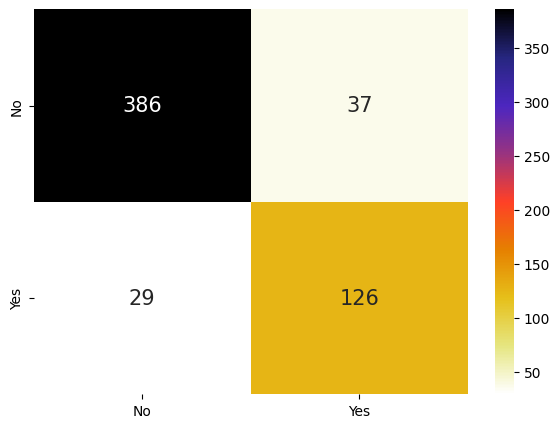

In [40]:
score_remove_window_234 = decision_tree_model(model_data)

Training data: (1347, 231)
Test data: (578, 231)

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       423
           1       1.00      0.15      0.26       155

    accuracy                           0.77       578
   macro avg       0.88      0.57      0.56       578
weighted avg       0.83      0.77      0.70       578

ROC_AUC_Score: 0.5741935483870968


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


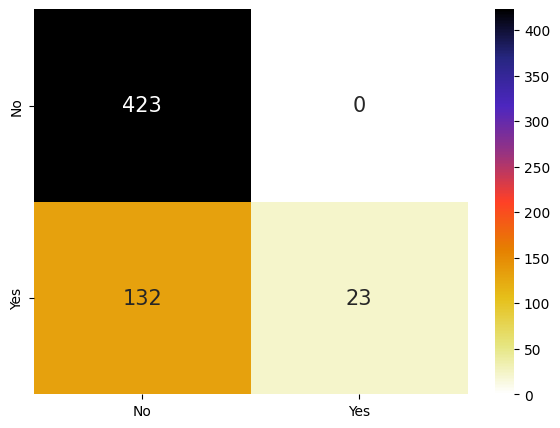

In [41]:
score_remove_window_234 = k_neighbors_model(model_data)

In [42]:
# Remove patients admitted to ICU in windows 6-12 and above 12
model_data = filled_data.copy()

remove_window_34 = model_data[(model_data['WINDOW'] == 3)|(model_data['WINDOW'] == 4) & (model_data['ICU'] == 1)].index
model_data.drop(remove_window_34, inplace=True)

model_data.head(15)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,ICU_SUM
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,1
1,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0,1
2,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,0,1
5,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,1,1
6,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,1,1
7,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,1,1
10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0,0,1
11,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1,0,1
12,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,2,0,1
15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,0


Training data: (1347, 231)
Test data: (578, 231)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       423
           1       0.86      0.80      0.83       155

    accuracy                           0.91       578
   macro avg       0.89      0.88      0.88       578
weighted avg       0.91      0.91      0.91       578

ROC_AUC_Score: 0.875177304964539


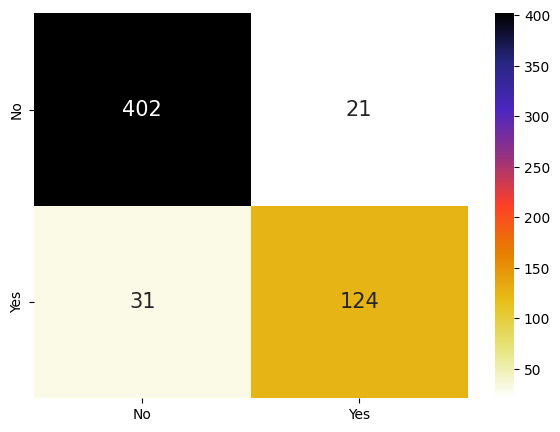

In [43]:
score_remove_window_34 = log_reg_model(model_data)

Training data: (1347, 231)
Test data: (578, 231)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       423
           1       0.81      0.78      0.80       155

    accuracy                           0.89       578
   macro avg       0.87      0.86      0.86       578
weighted avg       0.89      0.89      0.89       578

ROC_AUC_Score: 0.8572256539312134


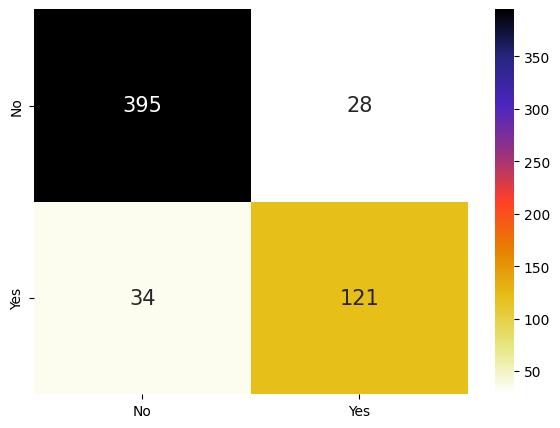

In [44]:
score_remove_window_34 = decision_tree_model(model_data)

Training data: (1347, 231)
Test data: (578, 231)

              precision    recall  f1-score   support

           0       0.78      1.00      0.87       423
           1       0.97      0.21      0.35       155

    accuracy                           0.79       578
   macro avg       0.87      0.61      0.61       578
weighted avg       0.83      0.79      0.73       578

ROC_AUC_Score: 0.6052695798062991


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


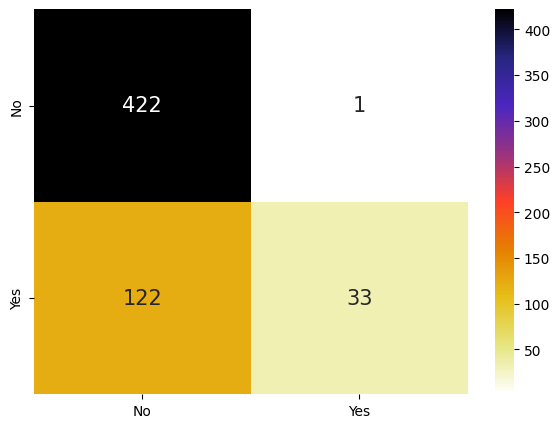

In [45]:
score_remove_window_34 = k_neighbors_model(model_data)

Logistic Regression and Decision Tree models consistently show correct predictions and efficiency for ICU admissions at around 85-90% with limited false positive and false negative results.

**Conclusion**

In conclusion, logistic regression and decision tree algorithms can be used to predict the need for confirmed COVID-19 patients to be admitted into ICU given clinical data. Our healthcare systems must incorporate innovative use of technologies like machine learning to improve the overall efficiency of hospitals and use of the intensive care unit. My machine learning models can provide solutions and assist doctors in critical decisions for saving lives.